In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install opencv-python-headless

In [4]:
# 이미지 모드 판단 함수 만들기
# 핵심 : IR이 3채널인 경우를 포함하여 함수 로직 설정, 채널 간 차이의 작고 큼을 판단.


import cv2
import numpy as np

# 이미지 모드 판단 함수
def determine_image_mode(image):

    # IR 이미지가 3채널인 경우, 각 채널이 유사한 값을 가질 가능성이 높음
    if image.shape[2] == 3:
        b, g, r = cv2.split(image)
        # 각 채널 간의 차이가 작으면 IR 이미지로 간주
        if np.allclose(b, g) and np.allclose(g, r):
            return "IR"
        else:
            return "RGB"
    else:
        return "Unknown"

# 이미지 경로 설정
image_path = '/content/drive/MyDrive/Capstone/unzip_dataset/rgb-t/images/thermal/train/flight3_frame27521.jpg'  # 이미지 파일 경로를 입력하세요

# 이미지 로드
image = cv2.imread(image_path)

# 이미지 모드 판단
mode = determine_image_mode(image)

# 결과 출력
print(f"The image mode is: {mode}")

The image mode is: IR


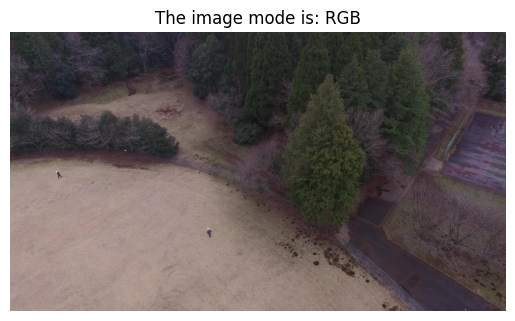

The image mode for /content/drive/MyDrive/Capstone/unzip_dataset/rgb-t/images/rgb/train/flight2_frame05881.jpg is: RGB


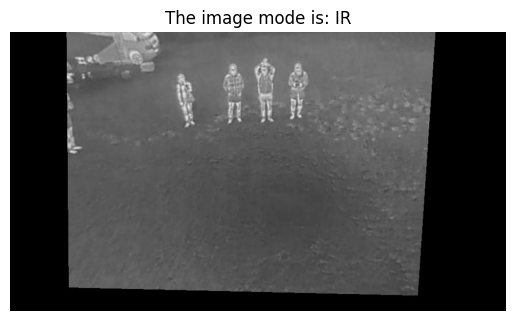

The image mode for /content/drive/MyDrive/Capstone/unzip_dataset/rgb-t/images/thermal/train/flight1_frame00021.jpg is: IR


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 모드 판단 함수
def determine_image_mode(image):
    if image.shape[2] == 3:
        b, g, r = cv2.split(image)
        if np.allclose(b, g) and np.allclose(g, r):
            return "IR"
        else:
            return "RGB"
    else:
        return "Unknown"

# 이미지 로드 함수
def load_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, image_rgb

# 주 함수
def process_images(image_paths):
    for image_path in image_paths:
        image, image_rgb = load_image(image_path)
        mode = determine_image_mode(image)

        plt.figure()
        plt.imshow(image_rgb)
        plt.title(f"The image mode is: {mode}")
        plt.axis('off')
        plt.show()

        print(f"The image mode for {image_path} is: {mode}")

# 테스트 이미지 경로 설정 (사용자 환경에 맞게 변경 필요)
image_paths = [
    "/content/drive/MyDrive/Capstone/unzip_dataset/rgb-t/images/rgb/train/flight2_frame05881.jpg",  # 예시 이미지 경로 1
    "/content/drive/MyDrive/Capstone/unzip_dataset/rgb-t/images/thermal/train/flight1_frame00021.jpg"   # 예시 이미지 경로 2
]

# 이미지 처리 및 평가
process_images(image_paths)


In [ ]:
## 모델로 연결되는 Auto-switch function

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 모드 판단 함수
def determine_image_mode(image):
    if image.shape[2] == 3:
        b, g, r = cv2.split(image)
        if np.allclose(b, g) and np.allclose(g, r):
            return "IR"
        else:
            return "RGB"
    else:
        return "Unknown"

# 이미지 로드 함수
def load_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, image_rgb

# 모델 평가 함수
def evaluate_model(model, image):
    return f"{model} model result"

# 앙상블 함수
def ensemble_results(result1, result2):
   return f"Ensembled result: {result1} + {result2}"

# 주 함수
  def process_images(image_paths):
      images = []
      modes = []
      results = []

      for image_path in image_paths:
          image, image_rgb = load_image(image_path)
          mode = determine_image_mode(image)
          modes.append(mode)

          plt.figure()
          plt.imshow(image_rgb)
          plt.title(f"The image mode is: {mode}")
          plt.axis('off')
          plt.show()

          if mode == "RGB":
              result = evaluate_model("RGB", image)
          elif mode == "IR":
              result = evaluate_model("IR", image)
          else:
              result = "Unsupported image mode."

          results.append(result)
          print(f"The image mode for {image_path} is: {mode}")
          print(f"Result: {result}")

      if len(image_paths) == 2 and "RGB" in modes and "IR" in modes:
          print("Pair of RGB and IR images detected. Performing ensemble...")
          final_result = ensemble_results(results[0], results[1])
          print(final_result)
      else:
          print("Ensemble not performed. Only one image or incompatible modes detected.")

  # 테스트 이미지 경로
  image_paths = [
      "/content/drive/MyDrive/Capstone/unzip_dataset/rgb-t/images/thermal/train/flight3_frame27521.jpg",  # 예시 이미지 경로 1
      "/content/drive/MyDrive/Capstone/unzip_dataset/rgb-t/images/thermal/train/flight3_frame27522.jpg"   # 예시 이미지 경로 2
  ]

# 이미지 처리 및 평가
process_images(image_paths)
